In [1]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import TextBlob
import spacy
from spacy import displacy

## Getting the info from the API

In [2]:
def get_info(name):
    """
    This function makes a request to The_simpsons database. 
    Arg: Name of the character to get the phrases from. 
    Returns: A dataframe with the phrases 
    """
    url = f"http://0.0.0.0:5000/phrases/{name}"
    phrases = requests.get(url)
    json = phrases.json()
    df = pd.DataFrame(json)
    return df

In [3]:
df_simpsons = pd.concat(
    [get_info("Homer Simpson"),
     get_info("Marge Simpson"), 
     get_info("Bart Simpson"),
     get_info("Lisa Simpson"),
     get_info("Maggie Simpson"),
    ])

In [4]:
df_simpsons

,character_id,phrase,name
0,2,But... but...,Homer Simpson
1,2,Wait a minute...,Homer Simpson
2,2,Santa?,Homer Simpson
3,2,But...,Homer Simpson
4,2,"Ah, son. One day you're gonna know the satisfa...",Homer Simpson
...,...,...,...
6,105,Very well. I'll drive.,Maggie Simpson
7,105,I need blood.,Maggie Simpson
8,105,"Throughout the ages, the finger painter, the P...",Maggie Simpson
9,105,/,Maggie Simpson


## Tokenization

In [5]:
def tokenize (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [6]:
df_simpsons['phrase_tokenization'] = df_simpsons['phrase'].apply(tokenize)

In [7]:
df_simpsons["phrase_tokenization"] = df_simpsons["phrase_tokenization"].apply(lambda x: ' '.join(x))
df_simpsons.head()

,character_id,phrase,name,phrase_tokenization
0,2,But... but...,Homer Simpson,But but
1,2,Wait a minute...,Homer Simpson,Wait a minute
2,2,Santa?,Homer Simpson,Santa
3,2,But...,Homer Simpson,But
4,2,"Ah, son. One day you're gonna know the satisfa...",Homer Simpson,Ah son One day you re gonna know the satisfact...


## Translation

In this case I do not need to translate it, as the database was already in English.

## Stop words

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/unai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/unai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Sentiment Analysis

In [10]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [11]:
df_simpsons['sentiment analysis'] = df_simpsons["phrase_tokenization"].apply(sentimentAnalysis)

In [12]:
df_simpsons2 = df_simpsons.groupby(['name'], as_index=False).mean()

In [5]:
df_simpsons2

NameError: name 'df_simpsons2' is not defined

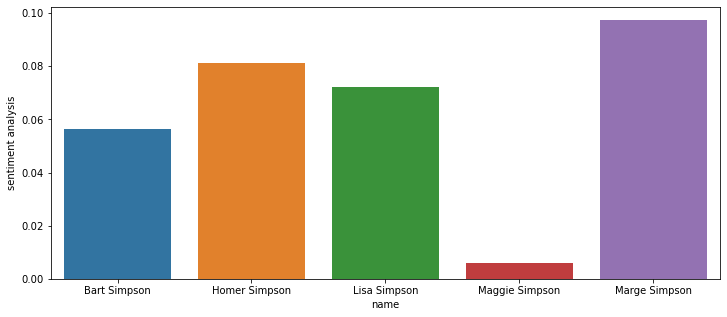

In [14]:
fig, ax = plt.subplots(1, 1,  figsize = (12,5))
simpsons_graph = sns.barplot(x = "name", y = "sentiment analysis", data = df_simpsons2)

In [15]:
fig.savefig("./images/simpsons_barplot.svg")

In [16]:
fig.savefig("./images/simpsons_barplot2.png")

/Users/unai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


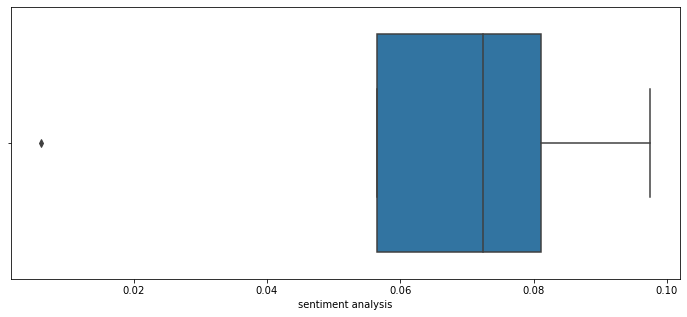

In [17]:
fig2, ax = plt.subplots(1, 1,  figsize = (12,5))
simpsons_boxplot = sns.boxplot(df_simpsons2['sentiment analysis'])

In [18]:
fig2.savefig("./images/simpsons_boxplot.svg")

#### Test with characters expected to be negative

In [19]:
df_negative_characters = pd.concat([
    get_info("Moe Szyslak"),
    get_info("Krusty the Clown"), 
    get_info("Selma Bouvier"),
    get_info("C. Montgomery Burns"),
    get_info("Edna Krabappel-Flanders"),
]
)

In [20]:
df_negative_characters

,character_id,phrase,name
0,17,So it's Christmas!,Moe Szyslak
1,17,"What's the matter, Homer? Somebody leave a lum...",Moe Szyslak
2,17,"No, sorry.",Moe Szyslak
3,17,I don't think you're ever going to get another...,Moe Szyslak
4,17,"Don't worry, we're still friends.",Moe Szyslak
...,...,...,...
755,40,"Now don't forget, this is the first exam under...",Edna Krabappel-Flanders
756,40,"Now don't forget, this is the first exam under...",Edna Krabappel-Flanders
757,40,Quick! Get a picture for the yearbook!,Edna Krabappel-Flanders
758,40,Ned! Ha!,Edna Krabappel-Flanders


In [21]:
df_negative_characters['phrase_tokenization'] = df_negative_characters['phrase'].apply(tokenize)

In [22]:
df_negative_characters["phrase_tokenization"] = df_negative_characters["phrase_tokenization"].apply(lambda x: ' '.join(x))
df_negative_characters.head()

,character_id,phrase,name,phrase_tokenization
0,17,So it's Christmas!,Moe Szyslak,So it s Christmas
1,17,"What's the matter, Homer? Somebody leave a lum...",Moe Szyslak,What s the matter Homer Somebody leave a lumpa...
2,17,"No, sorry.",Moe Szyslak,No sorry
3,17,I don't think you're ever going to get another...,Moe Szyslak,I don t think you re ever going to get another...
4,17,"Don't worry, we're still friends.",Moe Szyslak,Don t worry we re still friends


In [23]:
df_negative_characters['sentiment analysis'] = df_negative_characters["phrase_tokenization"].apply(sentimentAnalysis)

In [24]:
df_negative_characters2 = df_negative_characters.groupby(['name'], as_index=False).mean()

In [25]:
df_negative_characters2

,name,character_id,sentiment analysis
0,C. Montgomery Burns,15,0.106830
1,Edna Krabappel-Flanders,40,0.115444
2,Krusty the Clown,139,0.091594
3,Moe Szyslak,17,0.092721
4,Selma Bouvier,22,0.077971


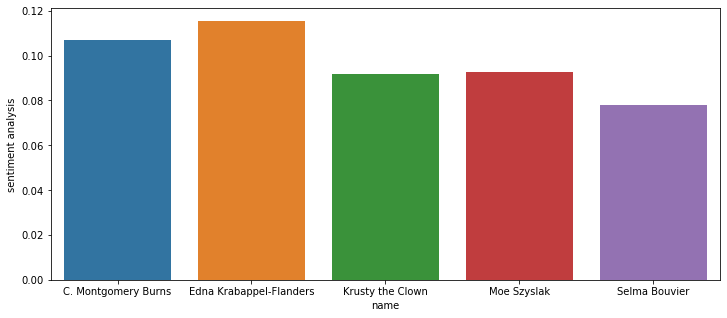

In [26]:
fig3, ax = plt.subplots(1, 1,  figsize = (12,5))
negative_character_barplot = sns.barplot(x = "name", y = "sentiment analysis", data = df_negative_characters2)

In [27]:
fig3.savefig("./images/negative_barplot.svg")

In [28]:
fig3.savefig("./images/negative_barplot2.png")

/Users/unai/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


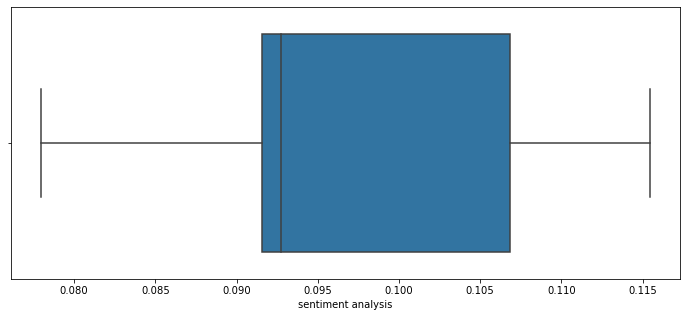

In [29]:
fig4, ax = plt.subplots(1, 1,  figsize = (12,5))
negative_character_boxplot = sns.boxplot(df_negative_characters2['sentiment analysis'])

In [30]:
fig4.savefig("./images/negative_boxplot.svg")

In [14]:
lista = ["Ana", "Homer", "Lisa", "Bart", "Maggie"]

In [15]:
def drop_columns(*args):
    for i in args:
        print(i)

In [16]:
drop_columns(lista)

['Ana', 'Homer', 'Lisa', 'Bart', 'Maggie']
